In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from DataProcessor import data_loader, data_processing, merger

In [108]:
data1 =  data_loader('Melbourne_housing_FULL.csv')
data1 = data_processing(data1)

data2 = data_loader('melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv')

df = merger(data1, data2) 
plt.ion()

### Over Price Distribution

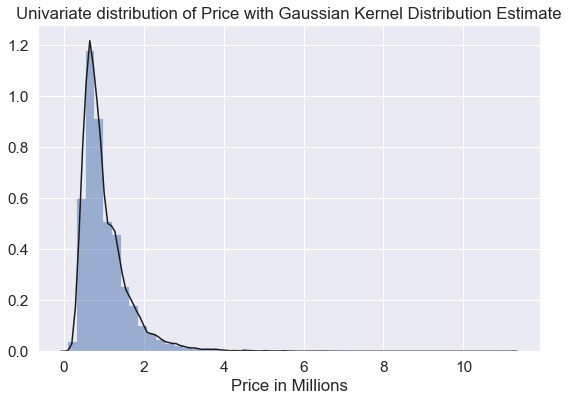

In [73]:
sns.set(font_scale=1.4)
g = sns.distplot(df['Price_M'], rug = False, rug_kws={'color':'g'}, kde_kws={'color':'k'},
                 hist_kws= {'histtype':'stepfilled', 'alpha':0.5})
g.figure.set_size_inches(9,6)
g.set_title('Univariate distribution of Price with Gaussian Kernel Distribution Estimate')
g.set_xlabel('Price in Millions')
plt.show()
sns.set()

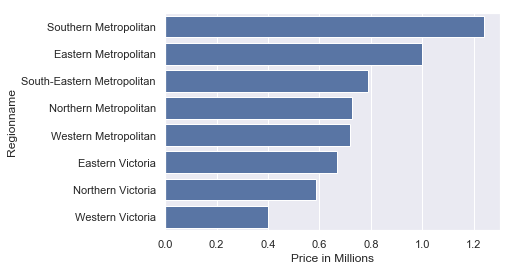

In [112]:
selected_data = df.groupby('Regionname').median().reset_index().sort_values('Price_M',ascending=False)
g=sns.barplot(y='Regionname',x='Price_M',data=selected_data,orient='h',color='b')
g.set_xlabel("Price in Millions")
plt.show()

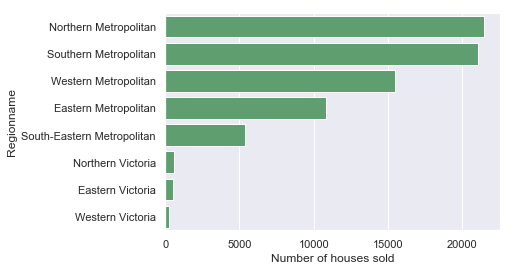

In [114]:
selected_data = df.groupby('Regionname').count().reset_index().sort_values('Price_M',ascending=False)
g=sns.barplot(y='Regionname',x='Price_M',data=selected_data,orient='h',color='g')
g.set_xlabel("Number of houses sold")
plt.show()

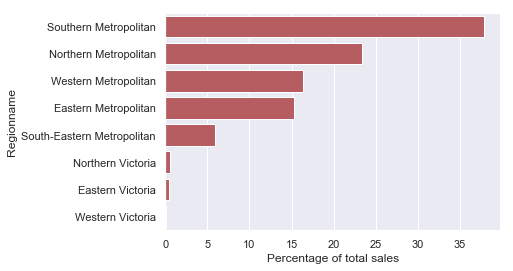

In [115]:
df1 = df.groupby('Regionname').sum().reset_index()[['Regionname','Price']]
df1['Percentage_Price'] = 100*df1['Price']/df1['Price'].sum()
df1=df1.sort_values('Percentage_Price',ascending=False)
g=sns.barplot(y='Regionname',x='Percentage_Price',orient='h',data=df1,color='r')
# for index, row in df.iterrows():
#         g.text(row['Percentage_Price'], row.name, np.round(row['Percentage_Price'],2), color='black',ha='left',fontsize = font_size)
#g.set_title('Percentage of total sales vs Regions')
g.set_xlabel('Percentage of total sales')
plt.show()
# df1_fig = bar_plot('Percent of Total Sales','Regionname', df1, fig_size=(14,8),fontscale=1.25,font_size=13, palette="rocket")

### Data for the four major regions

In [116]:
df_Reg4 = df[df.Regionname.str.contains('Metropolitan')]
df_Reg4 = df_Reg4[~df_Reg4.Regionname.str.contains('South-E')]

### Price Distribution

In [85]:
df_=df_Reg4.groupby('Regionname').sum().reset_index()

In [88]:
df_

,Regionname,Rooms,Price,Distance,year,month,Price_M
0,Eastern Metropolitan,36841,1.175442e+10,163976.1,21892430,76396,11754.423942
1,Northern Metropolitan,61447,1.797356e+10,217470.9,43280623,150818,17973.563990
2,Southern Metropolitan,61352,2.912742e+10,190904.9,42493749,149757,29127.417128
3,Western Metropolitan,48237,1.261913e+10,172174.5,31251158,108722,12619.130806


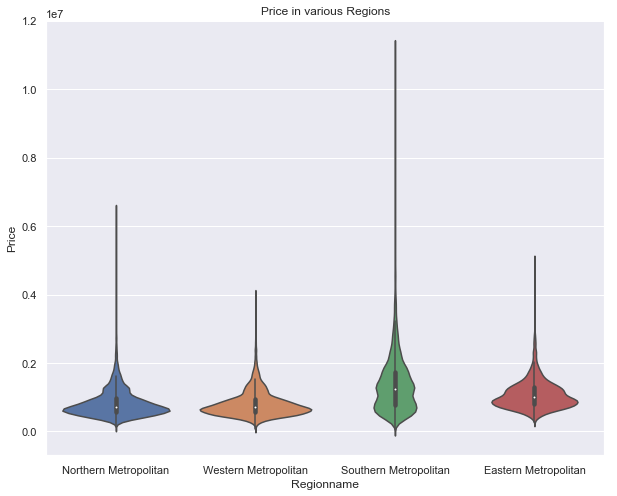

In [93]:

g = sns.violinplot(x='Regionname',y='Price',data=df_Reg4)
g.set_ylabel('Price')
g.figure.set_size_inches(10,8)
g.set_title('Price in various Regions')
plt.show()

### monthly trend for complete data according to regionnames:

In [41]:
month_list = ['January', 'Feburary', 'March', 'April', 'May', 'June', 'July', 
              'August', 'September', 'October', 'November', 'December']

season_list = ['Winter', 'Spring','Summer','Autumn'] 

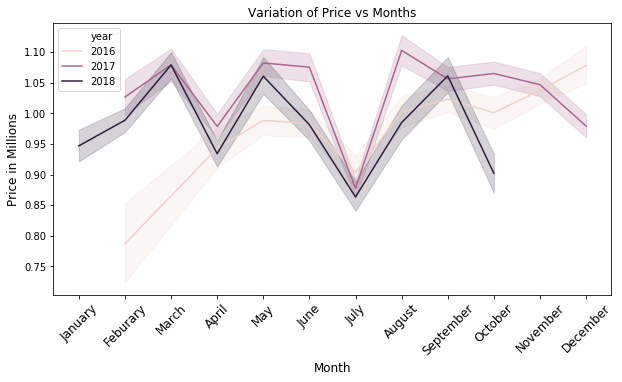

In [46]:
g=sns.lineplot(x="month", y="Price_M",hue='year', data = df)
g.figure.set_size_inches(10,5)
g.xaxis.set_major_locator(plt.MultipleLocator(1))
g.set_xticklabels(rotation=45, labels=['buffer']+month_list, fontsize='large')
g.set_xlabel('Month',fontsize='large')
g.set_ylabel('Price in Millions',fontsize='large')
g.set_title('Variation of Price vs Months',fontsize='large')
plt.show()

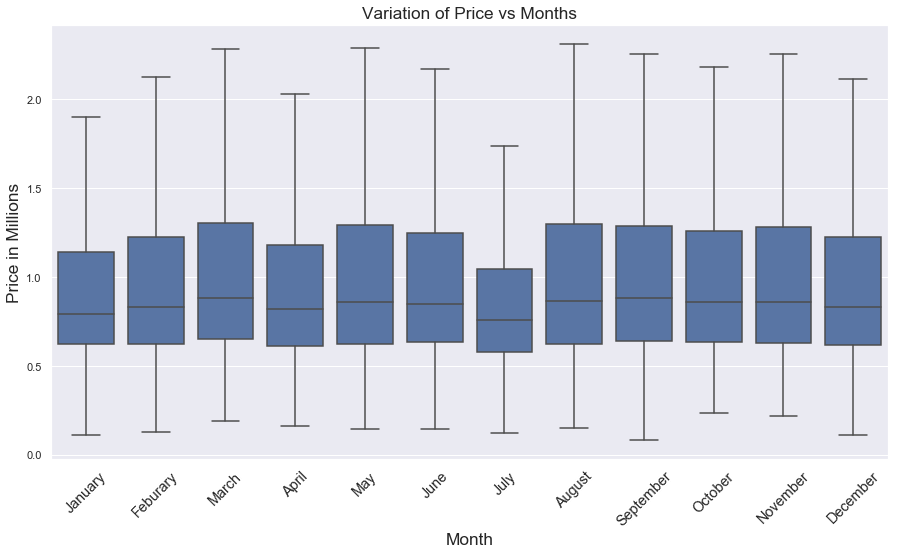

In [96]:
g=sns.boxplot(x="month", y="Price_M", data = df,showfliers=False,color='b')
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(plt.MultipleLocator(1))
g.set_xticklabels(rotation=45, labels=['buffer']+month_list,fontsize='large')
g.set_xlabel('Month',fontsize='x-large')
g.set_ylabel('Price in Millions',fontsize='x-large')
g.set_title('Variation of Price vs Months',fontsize='x-large')
plt.show()

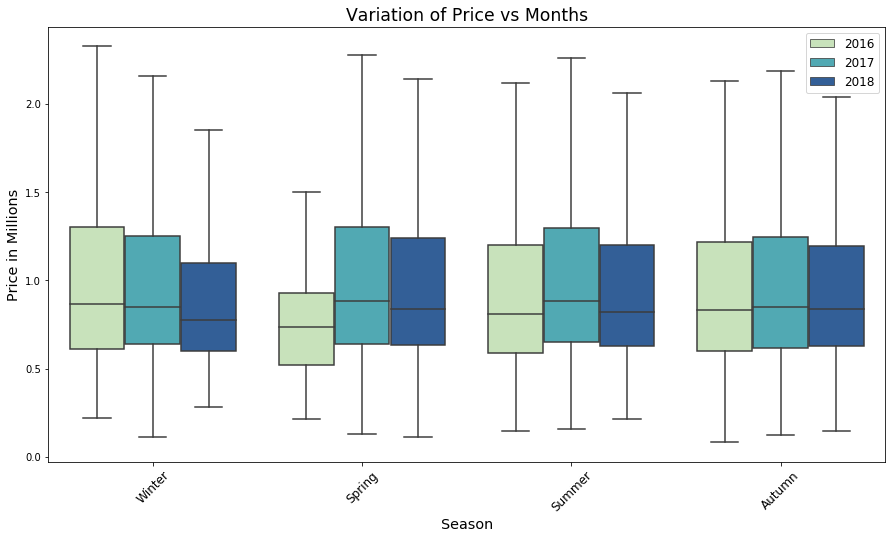

In [48]:
g=sns.boxplot(x="Season", y="Price_M", data = df,showfliers=False,hue='year', palette='YlGnBu')
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(plt.MultipleLocator(1))
g.set_xticklabels(rotation=45, labels=['buffer']+season_list,fontsize='large')
g.legend(fontsize='large',loc=1)
g.set_xlabel('Season',fontsize='x-large')
g.set_ylabel('Price in Millions',fontsize='x-large')
g.set_title('Variation of Price vs Months',fontsize='xx-large')
plt.show()

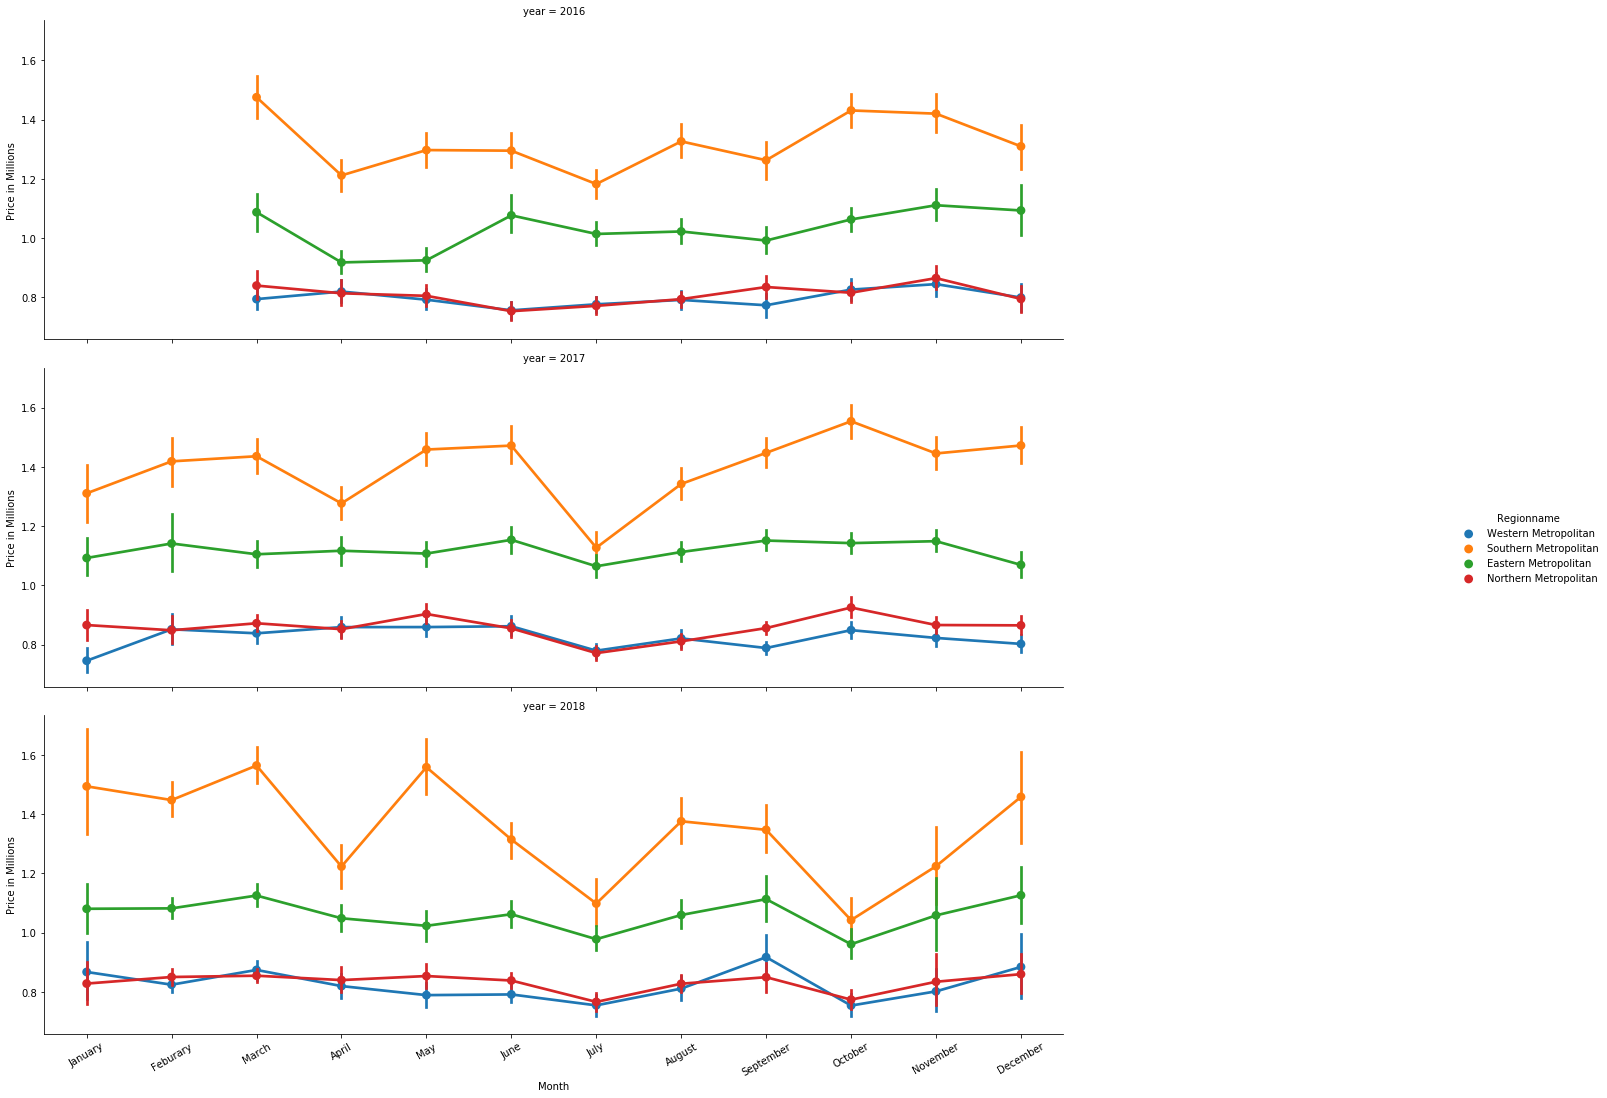

In [114]:
g=sns.catplot(x="Month", y="Price in Millions", kind="point", hue='Regionname',row='year', data=df_all_Reg4[df_all_Reg4['Price in Millions']<7].sort_values('month'));
g.fig.set_size_inches(25,15)
g.set_xticklabels(rotation=30, labels = month_list)
plt.show() b

In [97]:
from scipy.stats import norm
def price_dist_for_region(region,df,color):
    g = sns.distplot(df[df['Regionname']==region].Price/1000000, kde=False, hist_kws={'color':color})
    g.figure.set_size_inches(9,5)
    g.set_xlabel('Price in Million')
    g.set_title('Distribution of Price for '+region+' Region')
    g.set_ylabel('Count of houses')
    plt.show()

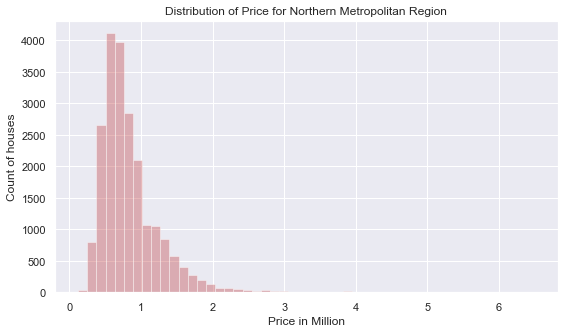

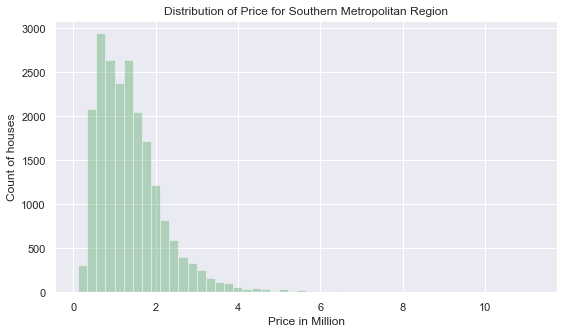

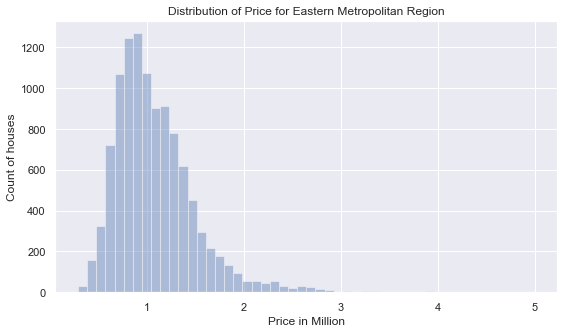

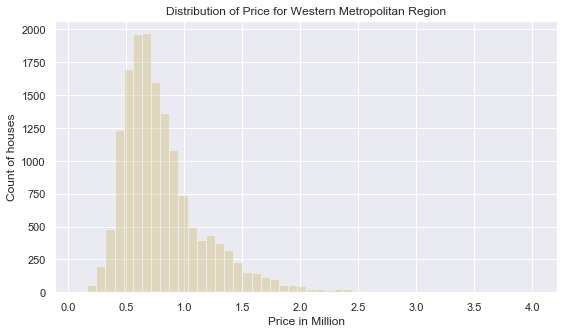

In [99]:
price_dist_for_region('Northern Metropolitan', df, color='r')
price_dist_for_region('Southern Metropolitan', df, color='g')
price_dist_for_region('Eastern Metropolitan', df, color='b')
price_dist_for_region('Western Metropolitan', df, color='y')

### Joint Plots fo Price vs different features like building area, cars, rooms, bedrooms, Landsize

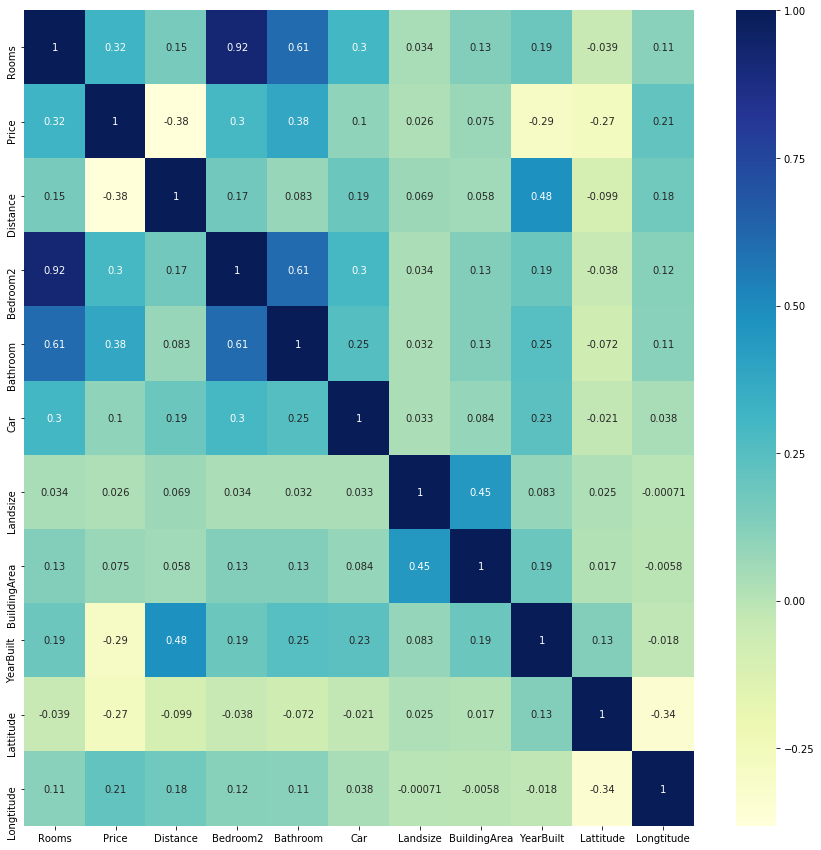

In [52]:
data_=data1.drop(['Address', 'Method','Postcode','Propertycount'], axis=1)
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data_[data_["Type"] == "h"].corr(), annot=True, cmap="YlGnBu")
plt.show()

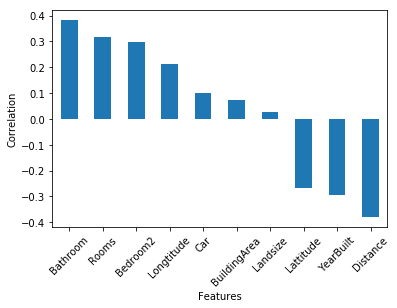

In [55]:
features=data_[data_["Type"] == "h"].corr().Price.sort_values(ascending=False)[1:]
g=features.plot(kind='bar',rot=45)
g.set_xlabel('Features')
g.set_ylabel('Correlation')
plt.show()

## Trend analysis

#### Price and Number of bathrooms

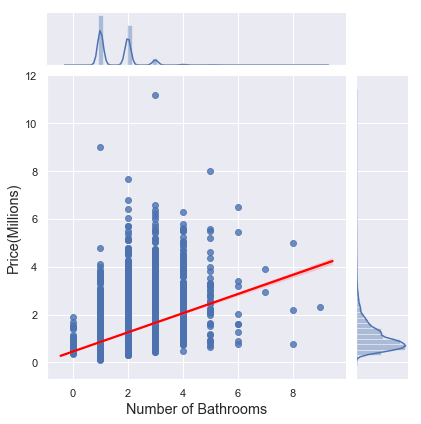

In [65]:
g = sns.JointGrid(x="Bathroom", y="Price_M", data=data1[data1['Bathroom']<20]) 
g.plot_joint(sns.regplot,order=1,line_kws={"color": "red"})
g.set_axis_labels(xlabel='Number of Bathrooms',ylabel='Price(Millions)',fontsize='large')
g.plot_marginals(sns.distplot)

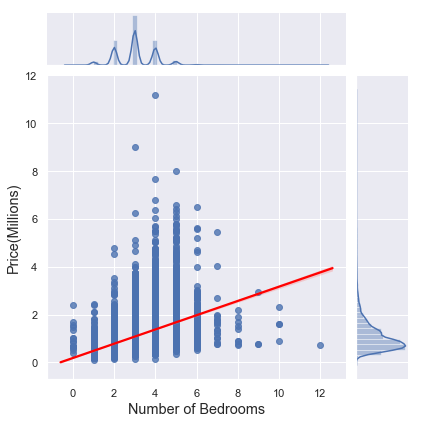

In [67]:
g = sns.JointGrid(x="Bedroom2", y="Price_M", data=data1[data1.Bedroom2<15]) 
g.plot_joint(sns.regplot,order=1,line_kws={"color": "red"})
g.set_axis_labels(xlabel='Number of Bedrooms',ylabel='Price(Millions)',fontsize='large')
g.plot_marginals(sns.distplot)

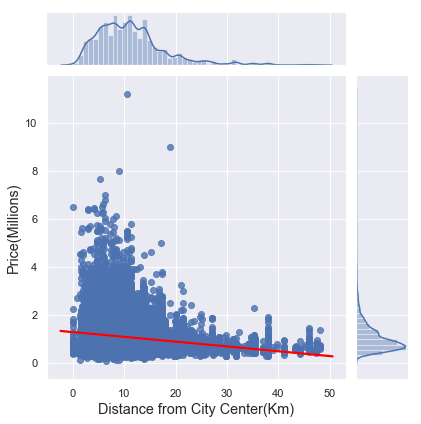

In [68]:
g = sns.JointGrid(x="Distance", y="Price_M", data=data1) 
g.plot_joint(sns.regplot,order=1,line_kws={"color": "red"})
g.set_axis_labels(xlabel='Distance from City Center(Km)',ylabel='Price(Millions)',fontsize='large')
g.plot_marginals(sns.distplot)

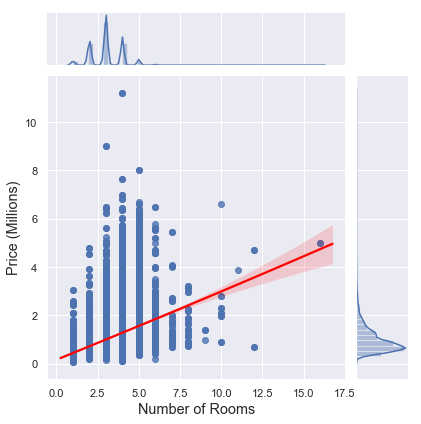

In [398]:
g = sns.JointGrid(x="Rooms", y="Price_M", data=df[df.Rooms<20]) 
g.plot_joint(sns.regplot,order=2,line_kws={"color": "red"})
g.set_axis_labels(xlabel='Number of Rooms',ylabel='Price (Millions)',fontsize='large')
g.plot_marginals(sns.distplot)

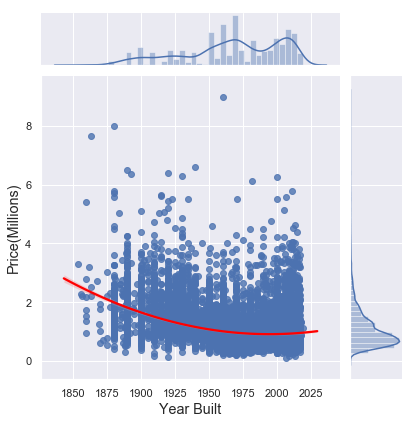

In [483]:
g = sns.JointGrid(x="YearBuilt", y="Price_M", data=data1[data1['YearBuilt']>1850]) 
g.plot_joint(sns.regplot,order=2,line_kws={"color": "red"})
g.set_axis_labels(xlabel='Year Built',ylabel='Price(Millions)',fontsize='large')
g.plot_marginals(sns.distplot)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


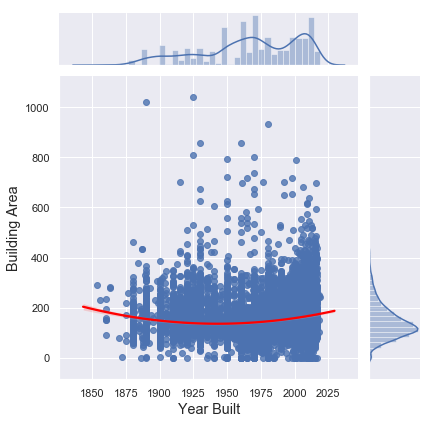

In [484]:
g = sns.JointGrid(x="YearBuilt", y="BuildingArea", data=data1[data1['YearBuilt']>1850][data1['BuildingArea']<1500]) 
g.plot_joint(sns.regplot,order=2,line_kws={"color": "red"})
g.set_axis_labels(xlabel='Year Built',ylabel='Building Area',fontsize='large')
g.plot_marginals(sns.distplot)

## Seller Analysis

In [117]:
seler_analysis=df.groupby(['year','Regionname','SellerG']).agg({'Price_M':['sum','median','max','mean','count']}).reset_index()

In [119]:
def __my_flatten_cols(self, how="_".join, reset_index=True):
    how = (lambda iter: list(iter)[-1]) if how == "last" else how
    self.columns = [how(filter(None, map(str, levels))) for levels in self.columns.values] \
                    if isinstance(self.columns, pd.MultiIndex) else self.columns
    return self.reset_index() if reset_index else self
pd.DataFrame.my_flatten_cols = __my_flatten_cols

In [120]:
seller_data=seler_analysis.my_flatten_cols()

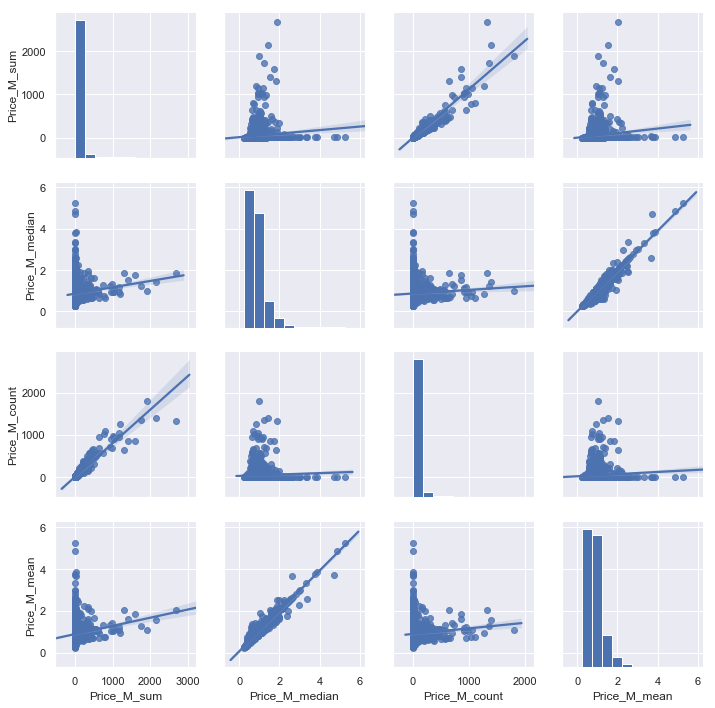

In [123]:
sns.pairplot(data=seller_data,vars=['Price_M_sum','Price_M_median','Price_M_count','Price_M_mean'],kind='reg')

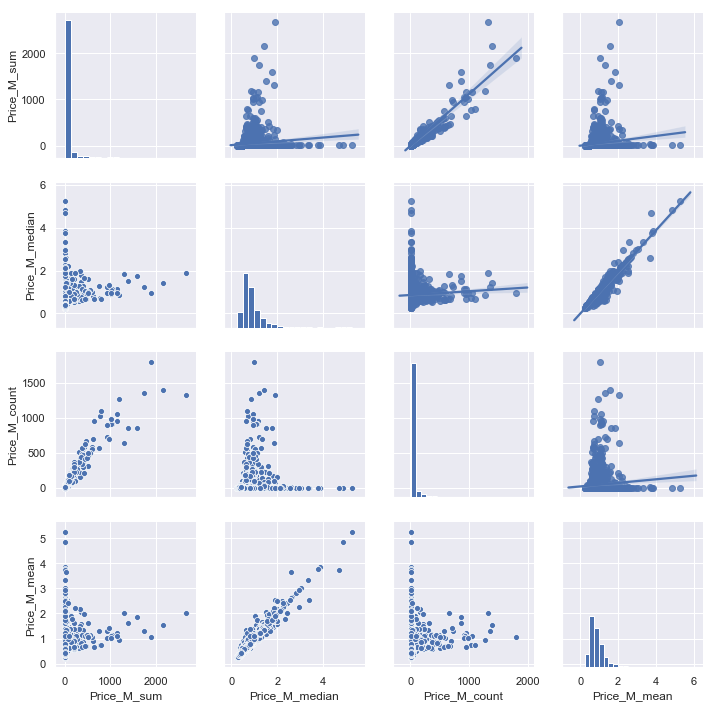

In [482]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=seller_data,vars=['Price_M_sum','Price_M_median','Price_M_count','Price_M_mean'])
grid = grid.map_upper(sns.regplot)
grid = grid.map_diag(plt.hist, bins = 20)
grid = grid.map_lower(sns.scatterplot)

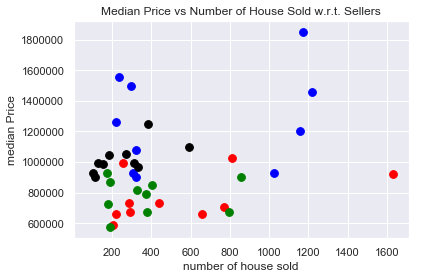

In [104]:


regionname=df['Regionname'].unique()[:4]
df_1=df[['Price','Regionname','SellerG']]

regionname

def top20seller(df):
    top20=df.groupby('SellerG').count().sort_values(by='Price',ascending=False)[0:10].index
    
    return top20

sellerlist={}
for region in regionname :
    sellerlist[region]=top20seller(df_1[df_1['Regionname']==region])
    

pairs={}
for region in sellerlist:
    df_2=df_1[df_1['Regionname']==region]
    pairs[region]=[]
    for seller in sellerlist[region]:
        df_3=df_2[df_2['SellerG']==seller]["Price"]
        num=df_3.count()
        median=df_3.median()
        pairs[region].append((num,median,seller))

pairs

data=[]
groups=[]
for region in pairs:
    data.append(pairs[region])
    groups.append(region)
colors = ("red", "green", "blue",'black')

 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(111)
j=0
for region in pairs:
    points=pairs[region]
    x=np.array([i[0] for i in points])
    y=np.array([[i[1] for i in points]])
    
    ax.scatter(x, y, s=60, c=colors[j], label=region)
    j+=1
plt.xlabel('number of house sold')
plt.ylabel('median Price')
plt.title('Median Price vs Number of House Sold w.r.t. Sellers')
#plt.legend(loc='upper center')
plt.show()